# VEST OMAS Initial Guide

이 Google Colab 및 Jupyter Notebook 기반 메뉴얼은 VEST 진단 및 모델링 데이터를 OMAS 라이브러리를 통해 로드, 분석 및 플로팅하는 방법을 안내합니다. 특히, 변환이 완료된 데이터를 활용하여 실질적인 데이터 분석이 가능하도록 예시와 설명을 포함하였습니다.

이는 3개년으로 구성된 VEST 공동 활용 과제의 데이터베이스 개발 과정 중 1차년도의 초기 데이터 공유 및 소개의 일환으로 준비되었으며, 2년 차에 공식적으로 DB 및 데이터 분석 코드 인프라가 개발되면, 본 예제를 포함한 Wiki 형식으로 데이터 베이스 접속 후 데이터 다운로드 및 업로드, 시뮬레이션과의 연계 분석 단계를 제공하는 것을 목표로 개발 중에 있습니다.

자세한 예제와 응용 사례를 더 살펴보고 싶다면 OMAS 공식 홈페이지(https://gafusion.github.io/omas/auto_examples/index.html)에서 제공하는 예제들을 참고하시기 바랍니다.

## 0. 기본 개념 설명
**IMAS**

IMAS(Integrated Modeling and Analysis Suite)는 ITER 핵융합 연구를 지원하기 위해 개발된 소프트웨어 및 데이터베이스 프레임워크입니다. 서로 다른 모델링 코드의 통합과 데이터 공유를 용이하게 하기 위해 설계되었습니다. IMAS는 IDS(IMAS data dictionary; Interface Data Structure)라는 계층적 트리 구조의 데이터 구조를 도입하여 핵융합 데이터 형식을 표준화하였습니다. IDS는 실험 데이터뿐만 아니라 시뮬레이션 데이터를 포함한 핵융합 연구에 필요한 다양한 데이터 유형을 포괄하며, 상수 값, 시계열, 다차원 데이터 등이 포함되어 있습니다. 또한 각 데이터는 측정 시간 및 위치와 같은 메타데이터 세트와 연결되어 있습니다.

이렇게 IMAS는 공통 데이터 구조를 제공함으로써 서로 다른 코드가 일관된 방식으로 데이터를 공유할 수 있게 합니다. 따라서 한 코드가 IMAS 데이터베이스에 출력을 쓰면 다른 코드가 이 데이터를 입력으로 읽을 수 있어 여러 코드가 얽힌 복잡한 워크플로우를 보다 쉽게 구성할 수 있게 해줍니다. IMAS는 핵융합 실험의 데이터 수집 시스템과 인터페이스할 수 있는 도구를 제공하며 이를 통해 실험 데이터를 IDS에 저장하고 분석하는 것이 가능합니다. 결과적으로 IMAS는 다양한 연구 그룹이 협업하며 데이터를 분석하고 공유하는 국제 협력 연구를 가능하게 합니다. 다만 현재 IMAS는 ITER 회원 및 관할 기관에서만 사용이 허가되어 자유로운 사용이 불가능하며, ITER 기관 아래 종속되어 있다는 단점이 존재합니다. 하지만 IMAS에서 사용하는 표준 IDS 자료는 후술할 OMAS를 통해 사용 가능합니다.

**OMAS**

[OMAS](https://gafusion.github.io/)(Ordered Multidimensional Array Structures)는 IDS와 동일한 자료 구조를 가지는 ODS라는 자료 구조를 이용해 핵융합 연구의 복잡한 데이터 구조를 쉽게 처리할 수 있도록 설계된 Python 라이브러리입니다. OMAS는 IMAS와 호환되지만, 독립적으로 사용이 가능한 오픈 소스 라이브러리입니다. 또한, OMAS는 다양한 데이터베이스 시스템과의 호환성 및 ML/DL에 유리한 다차원 행렬 구조의 병렬 처리 기능 등을 제공합니다. IMAS와 달리 오픈소스로 공개가 되어 있어 데이터베이스 시스템 및 데이터 분석 코드와 연계하여 핵융합 연구 데이터를 표준화된 형식으로 관리하는데 활용될 수 있습니다. 본 VEST 실험 데이터베이스 및 데이터 분석 인프라는 기본적으로 OMAS 라이브러리를 기반으로 구현됩니다.


**OMFIT**

[OMFIT](https://omfit.io/)(One Modeling Framework for Integrated Tasks)은 핵융합 연구를 위한 대형 소프트웨어 플랫폼으로, 핵융합 연구에 사용되는 다양한 진단, 시뮬레이션, 모델링 코드를 통합할 수 있는 공통 플랫폼을 제공합니다. OMFIT은 평형(EFIT, CHEASE...), 수송(TRANSP, ONETWO...), 안정성(BALOO, GPEC), 가열 및 전류 구동(TORAY, FREYA...) 등 다양한 코드들 간의 인터페이스 역할을 제공하며, 실험 및 시뮬레이션 데이터를 분석 및 시각화하는 다양한 도구를 갖추고 있습니다. 따라서 OMFIT은 IMAS와 유사한 방식으로 실험 및 시뮬레이션의 복잡한 워크플로우를 자동화하고 검증하며 데이터의 불확도를 정량화하고 최적화하는데 활용할 수 있습니다. OMFIT은 DIII-D, NSTX, K-STAR 등 다양한 연구기관에서 사용되고 검증되어 왔으며, IMAS와 달리 라이센스 요청서만 작성하면 누구든지 연구 목적으로 소스 코드에 접근하고 사용할 수 있다는 장점이 있습니다. OMAS를 통하면 추가적인 File IO 및 워크플로우 구현 없이 OMFIT의 여러 코드에 접근이 가능합니다.

## 2. OMAS 라이브러리 기본 사용법

In [ ]:


# text 및 index 데이터
ods['dataset_description.data_entry.pulse_type'] = 'test'
ods['dataset_description.data_entry.run'] = 1
ods['dataset_description.data_entry.user'] = 'test_user'
# 1D 데이터
ods['temporary.dynamic_float1d.0.identifier.name'] = 'test1d'
ods['temporary.dynamic_float1d.0.value.time'] = np.array([0.0, 1.0, 2.0])
ods['temporary.dynamic_float1d.0.value.data'] = np.array([0.0, 1.0, 2.0])
# 2D 데이터
ods['temporary.dynamic_float2d.0.identifier.name'] = 'test2d'
ods['temporary.dynamic_float2d.0.value.time'] = np.array([0.0, 1.0, 2.0])
ods['temporary.dynamic_float2d.0.value.data'] = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])

In [ ]:
def print_all_paths(ods):
    # Print all paths and sub-keys in the ODS
    def recursive_print(ods_dict, current_path=""):
        if isinstance(ods_dict, dict):
            for key, value in ods_dict.items():
                new_path = f"{current_path}.{key}" if current_path else key
                print(new_path)
                recursive_print(value, new_path)
        elif isinstance(ods_dict, list):
            for i, item in enumerate(ods_dict):
                list_path = f"{current_path}[{i}]"
                print(list_path)
                recursive_print(item, list_path)

    recursive_print(ods)

print_all_paths(ods)

In [ ]:
# ODS 객체 내 현재 존재하는 IDS list 출력
for key in ods.keys():
    print(key)

coils_non_axisymmetric
dataset_description
em_coupling
equilibrium
magnetics
pf_active
pf_passive
spectrometer_uv
tf
wall
temporary


In [ ]:
# ODS 객체 내 현재 존재하는 모든 하부 path 경로 출력
def print_all_paths(ods):
    # Use the ODS paths() function to get all available paths
    def contains_number_greater_than_one(lst):
        # Check if the list contains a number greater than 1 (used for filtering duplicated paths)
        for item in lst:
            if isinstance(item, int) and item > 0:
                return False
        return True
    for path in ods.paths():
        if contains_number_greater_than_one(path):
            path_string = '.'.join(map(str, path))
            print(path_string)

print_all_paths(ods)

coils_non_axisymmetric.coil.0.current.data
coils_non_axisymmetric.coil.0.current.time
coils_non_axisymmetric.coil.0.identifier
dataset_description.data_entry.machine
dataset_description.data_entry.pulse
dataset_description.data_entry.pulse_type
dataset_description.data_entry.run
dataset_description.data_entry.user
em_coupling.mutual_active_active
em_coupling.mutual_passive_active
em_coupling.mutual_passive_passive
equilibrium.code.parameters.time_slice.0.auxquantities.degrees_of_freedom
equilibrium.code.parameters.time_slice.0.auxquantities.num_fit_variables
equilibrium.code.parameters.time_slice.0.auxquantities.num_hard_constraints
equilibrium.code.parameters.time_slice.0.auxquantities.num_input_data
equilibrium.code.parameters.time_slice.0.auxquantities.sigxxj
equilibrium.code.parameters.time_slice.0.basis.ee2bdry
equilibrium.code.parameters.time_slice.0.basis.eebdry
equilibrium.code.parameters.time_slice.0.basis.eeknt
equilibrium.code.parameters.time_slice.0.basis.eetens
equilibrium

## 3. 진단 장치의 맵핑 및 관리 현황


VEST에서는 NI 데이터 수집 시스템과 Labview 제어 시스템을 통해 실험을 수행하며, Raw 데이터는 VEST 내부 SQL 기반의 대용량 서버 환경에 저장됩니다. 각 진단 담당자는 후처리된 진단 데이터를 자체 파일 형식으로 보관하고 있습니다. 이 데이터 관리 방식은 타 핵융합 실험 장치와 다르며, 서울대 학내 네트워크에서만 접근 가능한 비공개 방식으로 운영되고 있어 공동 연구 환경 구축에 어려움이 있습니다. 따라서, 데이터베이스 인프라의 개선이 필요한 상황입니다.

Machine-Mapping 작업을 통해 OMAS 데이터는 VEST 연구실 내 분산되어 보관된 실험 및 진단 데이터를 샷당 1개의 표준화된 데이터 파일로 보관하게 됩니다.

또한 VEST는 실험 및 진단 장치의 경우 상시 운용되는 장치가 존재하며, 운용 중이지만 특정 실험에서만 사용되는 장치, 유지 보수나 개발, 그리고 검증이 아직 진행 중인 장치가 함께 존재합니다.



### 실험 및 진단 장치들의 목록

아래 표는 앞으로 맵핑을 진행할 현재 존재하는 VEST의 모든 실험 및 진단 데이터의 목록을 정리한 표입니다.


| Type | System | ODS path | Manager | Static Parameter (a.k.a. Geometry) | Dynamic Parameter (a.k.a. Experimental Data) |
| --- | --- | --- | --- | --- | --- |
| Information | Data Description | dataset_description | Joint | machine | date, shot remark, label, wall_condition, trigger timing/duration, shot_summary |
| Control | PF coil | pf_active | Joint | geometry, circuit | current, charging voltage |
| Control | TF coil | tf | Joint | coil_turns | current, BtR |
| Control | Gas Pumping | gas_pumping | 정원익, 전찬휘 | duct | flow_rate |
| Control | Gas Injection | gas_injection | Joint | pipe(;value) postion | gas_puffing_timing, duration, flow_rate, species |
| Control | ECH | ec_launchers | 변준혁 | frequency, launching_position, mode | forward_power, reversed_power |
| Control | NBI | nbi | 정윤호 | aperture,  beam_line, source_position, species | beam_V, beam_I, suppression_V, supperession_I, particles_fraction, power |
| Control | Helicity Injection | not developed | 박종윤, 김태경 | gun_position | injection_V, injection_I, Arc_V, Arc_I, Limit_V |
| Diagnostics | Ip Rogowski Coil (Plasma Current) | magnetics.rogowski_coil | Joint | area, turns | ip |
| Diagnostics | Flux Loop | magnetics.flux_loop | 남건우 | position | poloidal mangetic flux |
| Diagnostics | Magnetic Probe (Mirnov Coil) | magnetics.b_field_pol_probe | 남건우 | position, poloidal angle, toroidal angle | poloidal magnetic field, toroidal_mode_number(n), voltage(for fluctuation) |
| Diagnostics | Diamagnetic Flux Rogowski Coil | magnetics.diamagnetic_flux | 김태경 | area, turns | diamagnetic flux |
| Diagnostics | Internal Magnetic Probe Probe | magnetics.b_field_pol_probe, b_field_tor_probe | 남건우 | type | position, voltage, angle, poloidal magnetic field, toroidal magnetic field |
| Diagnostics | Fast Camera | camera_visible | Joint | geometry_matrix | image, resolution, timeframe, used filter/lens |
| Diagnostics | Filterscope Spectroscopy | spectrometer_uv | Joint | line of sight, toroidal_angle, label(Halpha, CII, CIII, OI) | intensity |
| Diagnostics | Triple Langmuir Probe | langmuir_probes.embedded | 변준혁 | vertical_position | floting_voltage, n_e, T_e, radial_position |
| Diagnostics | Interferometer | interferometer | 변준혁 | position, line_of_sight, optical_path, wavelength, | line-integrated electron density, validity(from fringe jump), phase |
| Diagnostics | Outboard Limiter Current Monitor | disruption.halo_currents | Joint | position | voltage |
| Diagnostics | Visible Bremstalung Spectroscopy | bremsstrahlung_visible | 유정원 | filter_wavelength, line of sight | channel intensity, Z_eff |
| Diagnostics | Vaccum Gauge | barometry.gauge | 정원익, 전찬휘 | position, type | pressure (PKR-251, FAST PIG) |
| Diagnostics | Charge Exchage/Beam Enission Spectroscopy | charge_exchange | 이원석, 엄태희 | line of sight, position | ion temperature, toroidal velocity |
| Diagnostics | Ion Doppler Spectroscopy | charge_exchange (alternative) | 이원석, 엄태희 | ion_species (C-III, O-II), raidal position, line of sight | impurity ion temperature, toroidal velocity |
| Diagnostics | Hard X-ray Detector | hard_x_rays | 임수빈 | channel, line of sight, energy_band | radiance |
| Diagnostics | Soft X-ray Detector | soft_x_rays | 임수빈, 이명원 | channel, line of sight, energy_band, filter_window | brightness, power, T_e |
| Diagnostics | Thomson Scattering Spectroscopy | thomson_scattering | 김중화, 이종민 | radial, vertical position, torodial_angle | n_e, T_e |
| Diagnostics | Wall | wall | 정원익, 전찬휘 | 2d_limiter_position, material, vessel_volume | wall_inventory, recycling_particles_coefficient, pumping_speed, particle_flux |





은 아래 코드 상에서 확인 가능합니다.

In [ ]:
# ODS 하부 객체들의 정보 출력
def print_dataset_description(ods, key_name=None):
    """
    Print information about the dataset.

    :param ods: OMAS data object containing dataset information.
    :param key_name: Optional specific key to provide detailed information.
    """
    key_list = list(ods.keys())

    if key_name is None:
        print("Data Description\n")
        print("{:<20} : {}".format("Machine_name", ods['dataset_description.data_entry.machine']))
        print("{:<20} : {}".format("shotnumber", ods['dataset_description.data_entry.pulse']))
        print("{:<20} : {}".format("Operation_type", ods['dataset_description.data_entry.pulse_type']))
        print("{:<20} : {}".format("Run", ods['dataset_description.data_entry.run']))
        print("{:<20} : {}".format("User_name", ods['dataset_description.data_entry.user']))
        print("\nODS List\n")
        for key in key_list:
            print("{:<20}".format(key), ':', ','.join(ods[key].keys()))
    elif key_name in key_list:
        print(f"\nNumber of {key_name} Data Set\n")
        for key in ods[key_name]:
            if key in ["time", "ids_properties"]:
                continue
            print(f"  {key:<17} : {len(ods[key_name][key])}")
    else:
        print("key_name value Error!")

print_dataset_description(ods)

### PF/TF Coil 시스템

In [ ]:
PF coil의 데이터는 pf_active, Vessl Element의 구조 및 Eddy 전류는 pf_passive, TF coil 및 토로이달 자기장 세기 정보는 tf에 저장되어 있습니다.

{'ax': <AxesSubplot:>}

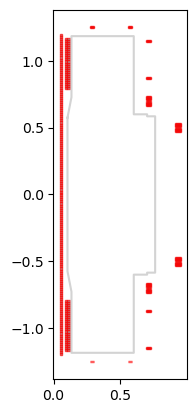

In [ ]:
# PF Coil Geometry
ods.plot_wall_overlay(color='lightgray')
ods.plot_pf_active_overlay(edgecolor='red')

In [ ]:
### PF coil

PF_used=[1,5,6,9,10]

for i in PF_used:
    plt.plot(ods['pf_active']['time'],ods['pf_active']['coil'][i-1]['current']['data']/1000,label=ods['pf_active']['coil'][i-1]['name'])

plt.legend()
plt.title('PF Coil Current')
plt.xlabel('Time [s]')
plt.ylabel('Current [kA]')
plt.grid()
plt.show()

NameError: name 'ods1' is not defined

### Vessel Passive 구조 및 Eddy 전류 분포

### Magnetics 진단계

Magnetics 진단계은 inductive loop 코일 방식으로 자기장 변화에서 유도되는 유도 전압을 통해 전류 변화를 측정하는 장비입니다.
VEST에서는 Global한 경향을 측정하는 자기 진단계로는 Plasma Current Rogowski Coil, Diamagnetic Flux Rogowski Coil, 여러 개의 Local한 지점을 측정하는 자기 진단계로는 Poloidal Magnetic Probe와 Flux Loop가 사용됩니다. 기본적으로 본 진단계들은 평형 재구성을 하는데 있어 기초적인 진단 데이터들로 사용됩니다.

Rogowski coil은 주로 플라즈마 전류 $I_p$를 측정하는데 사용되는 장비로, VEST의 경우 플라즈마에 의해 유발되는 TF 전류의 변화에 의한 Diamagnetic Flux를 측정하는 경우에도 사용됩니다.

In [ ]:
# Plotting Plasma Current and Diamagnetic Flux
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title('Plasma Current')
ax1.plot(ods['magnetics.time'], ods['magnetics.ip.0.data'] * 1.0e-3)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Ip [MA]')
ax1.grid(True)

ax2.plot(ods['magnetics.time'], ods['magnetics.diamagnetic_flux.0.data'])
ax2.set_title('Diamagnetic Flux')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Diamagnetic Flux [Wb]')
ax2.grid(True)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # 두 그래프 사이의 간격 조정 (wspace 값 증가)
plt.show()


Flux Loop 및 B Field Pol Probe의 위치

diamagnetic_flux data has been excepted
ip data has been excepted


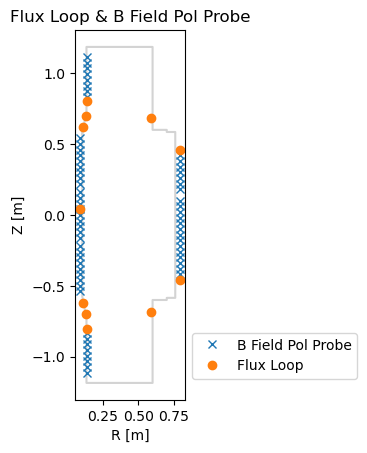

In [ ]:
#챔버 벽
ods.plot_wall_overlay(color='lightgray')
#진단장치
for key in ods['magnetics']:
    if key == "time" or key == "ids_properties":
        continue
    elif key == 'flux_loop':
        plt.plot(ods[f'magnetics.{key}.:.position.0.r'], ods[f'magnetics.{key}.:.position.0.z'], 'o', label='Flux Loop')  # 라벨 추가
    elif key == 'b_field_pol_probe':
        plt.plot(ods[f'magnetics.{key}.:.position.r'], ods[f'magnetics.{key}.:.position.z'], 'x', label='B Field Pol Probe')  # 라벨 추가
    else:
        print(f'{key} data has been excepted')

plt.title('Flux Loop & B Field Pol Probe')
plt.xlabel('R [m]')
plt.ylabel('Z [m]')
plt.axis('scaled')

# 범례를 그래프 밖에 위치시키기
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.2))
plt.show()

In [ ]:
# 폴로이달(or Vertical 방향) 자기장을 측정하는 Magnetic Probe 데이터는 VEST 위치에 따라 안쪽부터 inboard, side, outboard 로 나눕니다.
# Magnetic flux를 측정하는 플럭스 루프 데이터(flux_loop) 또한 위치에 따라 inFlux와 OutFlux로 나눕니다.
Index_inBz = np.where(ods['magnetics.b_field_pol_probe.:.position.r']<0.09)
Index_outBz = np.where(ods['magnetics.b_field_pol_probe.:.position.r']>0.795)
Index_sideBz = np.where(np.abs(ods['magnetics.b_field_pol_probe.:.position.z']) > 0.8)
Index_inFlux = np.where(ods['magnetics.flux_loop.:.position.0.r'] < 0.15)
Index_outFlux = np.where(ods['magnetics.flux_loop.:.position.0.r'] > 0.5)

In [ ]:
def plot_b_field_pol_probe(indices, ods, n_columns):
    """
    Plot B field from poloidal probes.

    :param indices: List of indices for the probes to be plotted.
    :param ods: OMAS data object containing dataset information.
    :param n_columns: Number of columns for subplot arrangement.
    """
    n_rows = (len(indices[0]) + n_columns - 1) // n_columns
    fig, axs = plt.subplots(n_rows, n_columns, figsize=(18, 3 * n_rows))

    for i, ax in zip(indices[0], axs.flatten()):
        radial = ods[f'magnetics.b_field_pol_probe.{i}.position.r']
        vertical = ods[f'magnetics.b_field_pol_probe.{i}.position.z']
        position = f'({radial:.2f}, {vertical:.2f})'
        ax.plot(ods['magnetics.time'], ods[f'magnetics.b_field_pol_probe.{i}.field.data'])
        ax.set_title(f'B_pol at {position}')

        if i % n_columns == 0:
            ax.set_ylabel("B Field [T]")
        if i >= len(indices[0]) - n_columns:
            ax.set_xlabel("Time")

    # Remove any empty subplots
    for j in range(len(indices[0]), len(axs.flatten())):
        fig.delaxes(axs.flatten()[j])

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

def plot_flux_loop(indices, ods, n_columns):
    """
    Plot magnetic flux from flux loops.

    :param indices: List of indices for the flux loops to be plotted.
    :param ods: OMAS data object containing dataset information.
    :param n_columns: Number of columns for subplot arrangement.
    """
    n_rows = (len(indices[0]) + n_columns - 1) // n_columns
    fig, axs = plt.subplots(n_rows, n_columns, figsize=(18, 3 * n_rows))

    for i, ax in zip(indices[0], axs.flatten()):
        radial = ods[f'magnetics.flux_loop.{i}.position.0.r']
        vertical = ods[f'magnetics.flux_loop.{i}.position.0.z']
        position = f'({radial}, {vertical})'
        ax.plot(ods['magnetics.time'], ods[f'magnetics.flux_loop.{i}.flux.data'])
        ax.set_title(f'Flux loop at {position} m')

        if i % n_columns == 0:
            ax.set_ylabel("Magnetic Flux [Wb]")
        if i >= len(indices[0]) - n_columns:
            ax.set_xlabel("Time")

    # Remove any empty subplots
    for j in range(len(indices[0]), len(axs.flatten())):
        fig.delaxes(axs.flatten()[j])


    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

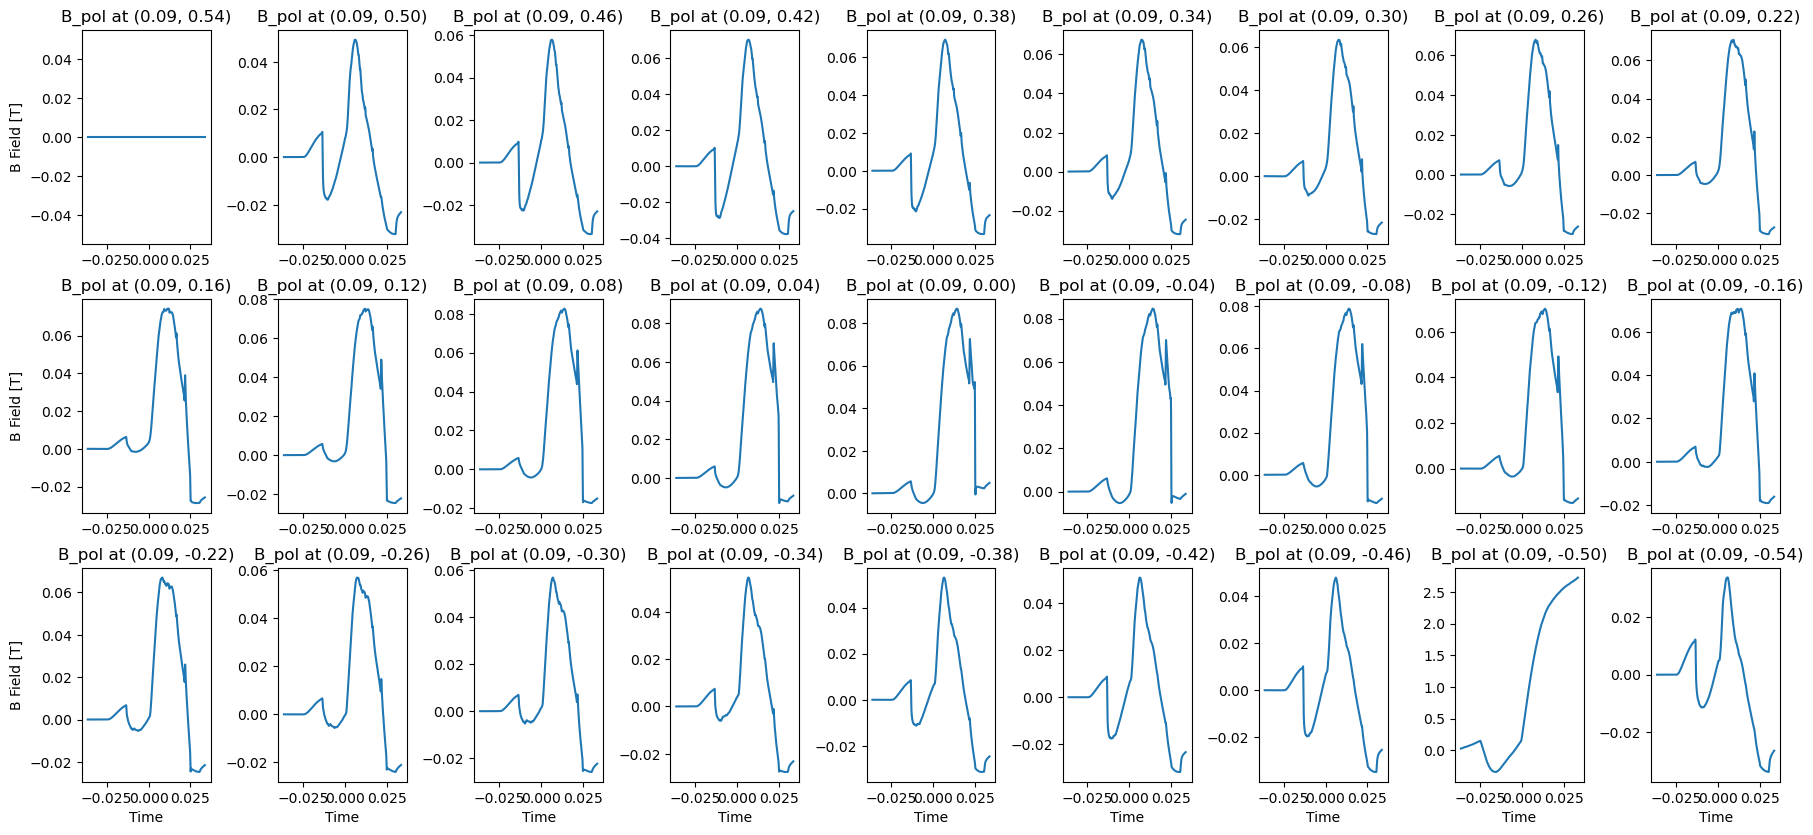

In [ ]:
plot_b_field_pol_probe(Index_inBz, ods, 9)

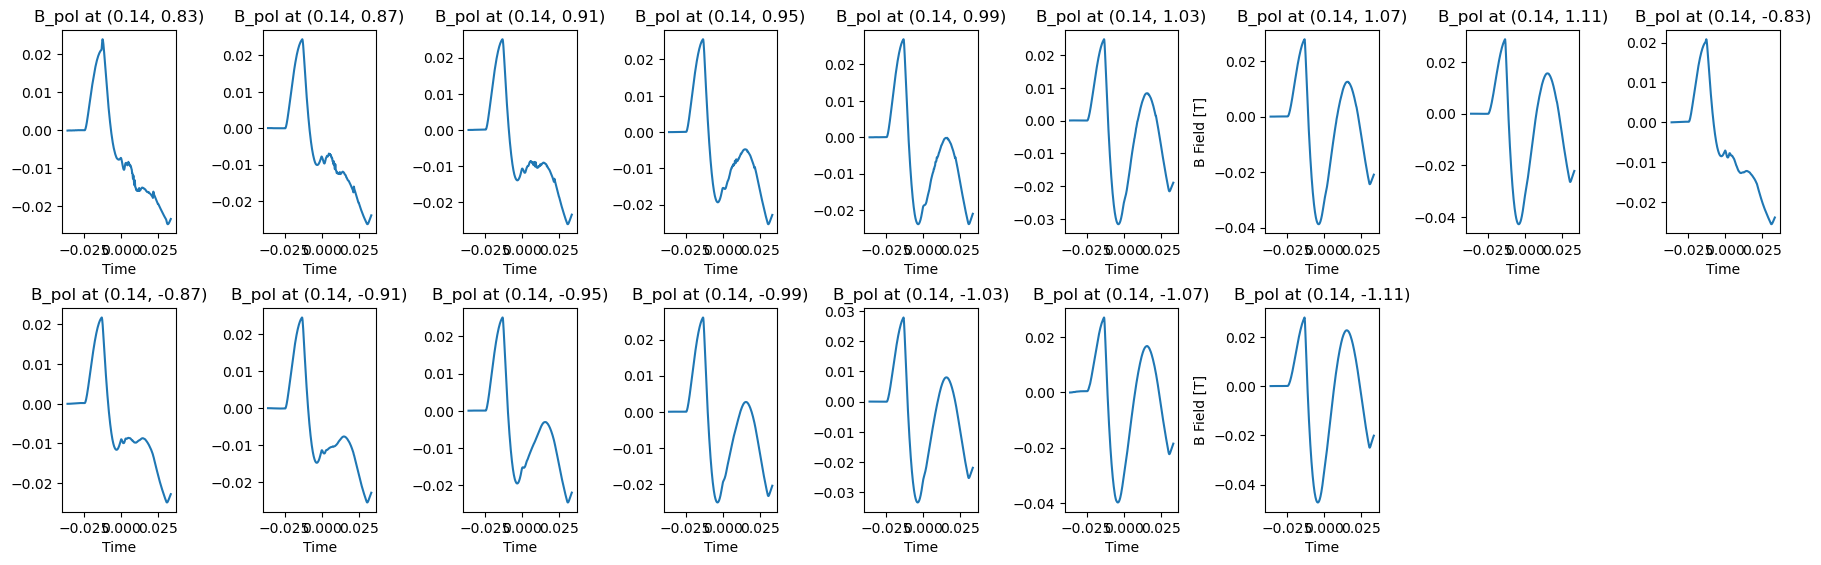

In [ ]:
plot_b_field_pol_probe(Index_sideBz, ods, 9)

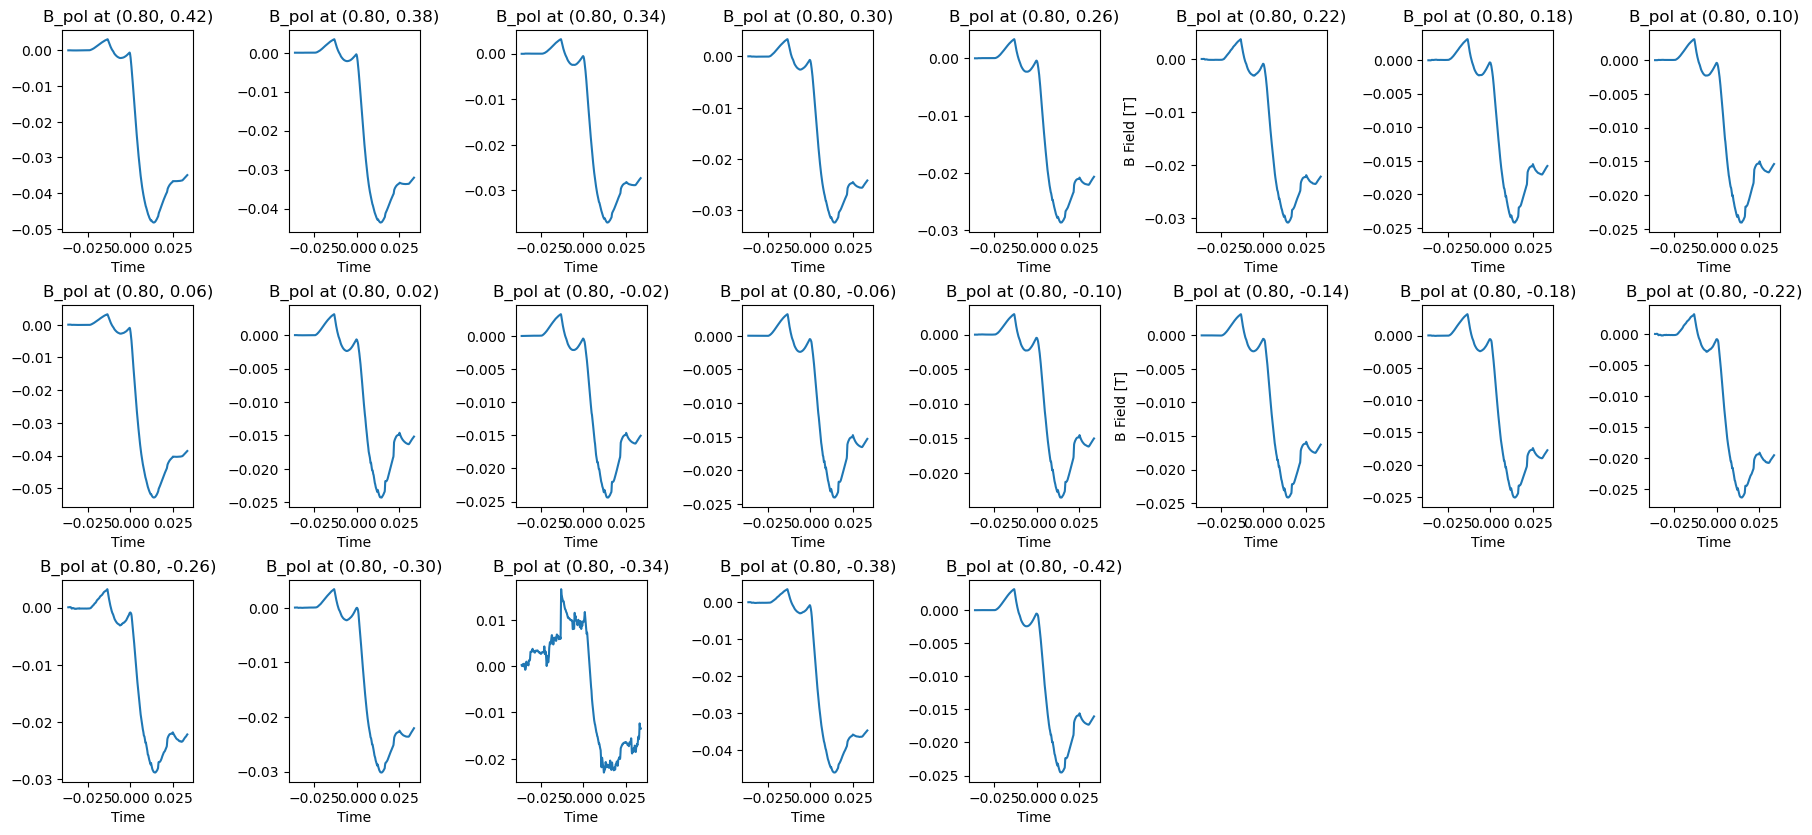

In [ ]:
plot_b_field_pol_probe(Index_outBz, ods, 8)

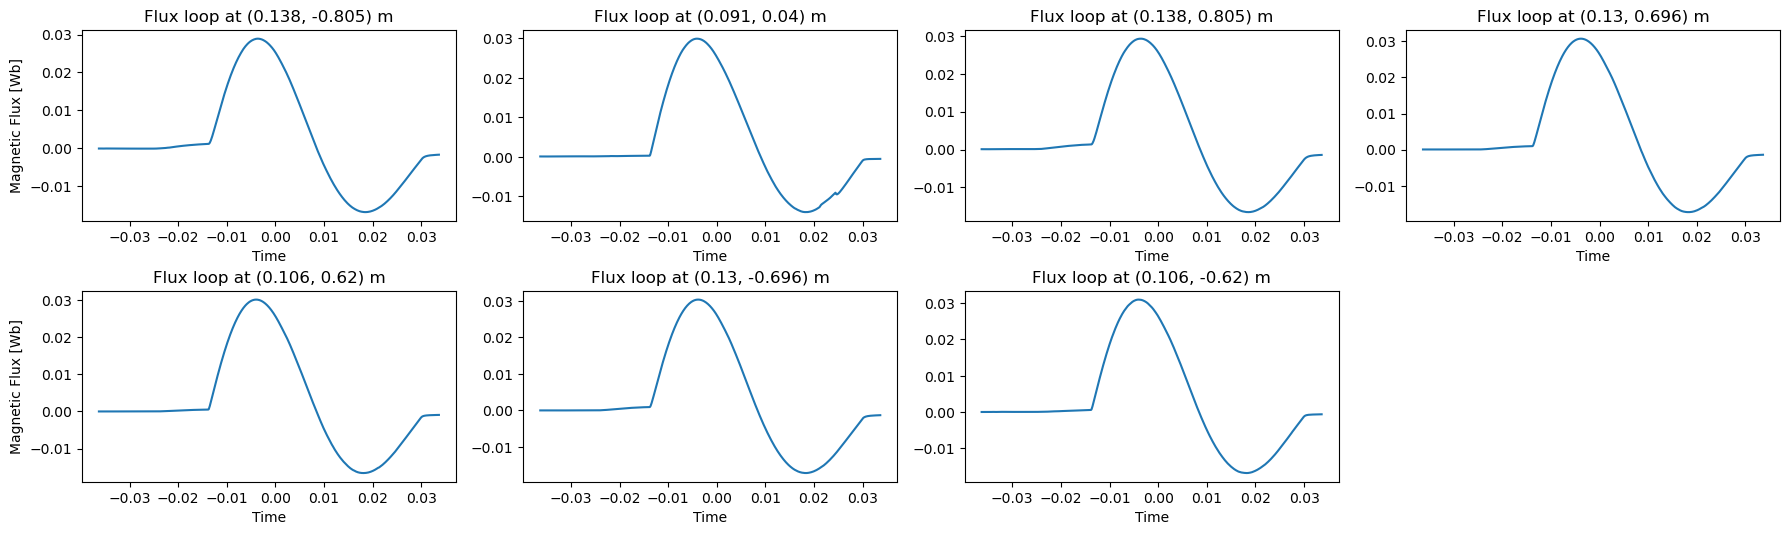

In [ ]:
plot_flux_loop(Index_inFlux, ods, 4)

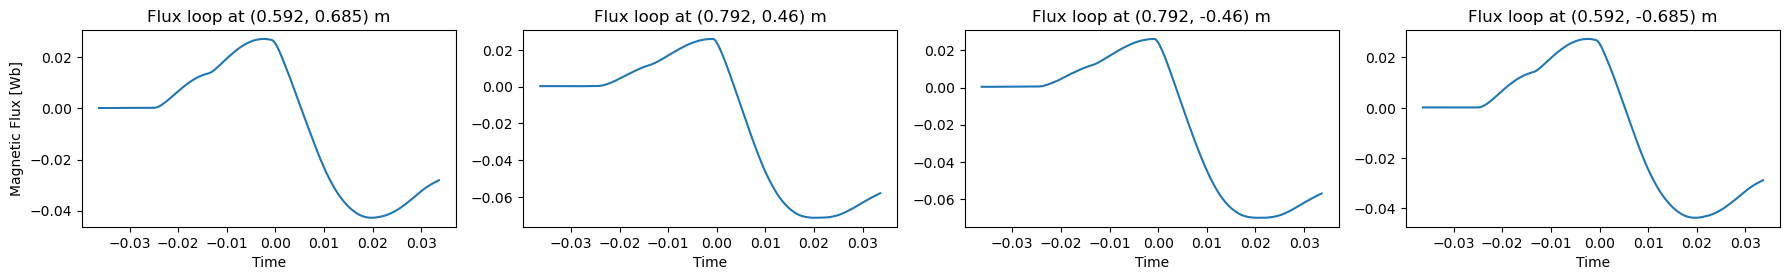

In [ ]:
plot_flux_loop(Index_outFlux, ods, 4)

현재 사용되고 있는 PF coil들에 대해 current data를 보여줍니다.

### Barometry
* Pressure 측정 데이터는 barometry라는 ids에 저장되어 있습니다.
* VEST에서는 PKR-251 Ion Gauge를 상시 운용 중에 있습니다.
(추가 예정)

### TF coil

* TF coil의 current 데이터와 F0 데이터를 plot합니다.

In [ ]:
# TF Current
plt.subplot(2,1,1)
plt.plot(ods['tf.time'],ods['tf.coil.0.current.data'])
plt.ylabel('Current [A]')
plt.grid()
# TF
plt.subplot(2,1,2)
plt.plot(ods['tf']['time'],ods['tf']['b_field_tor_vacuum_r']['data'])
plt.xlabel('Time [s]')
plt.ylabel('Vacuum $B_{tor}$ times major radius [Tm]')
plt.grid()


### spectrometer_uv

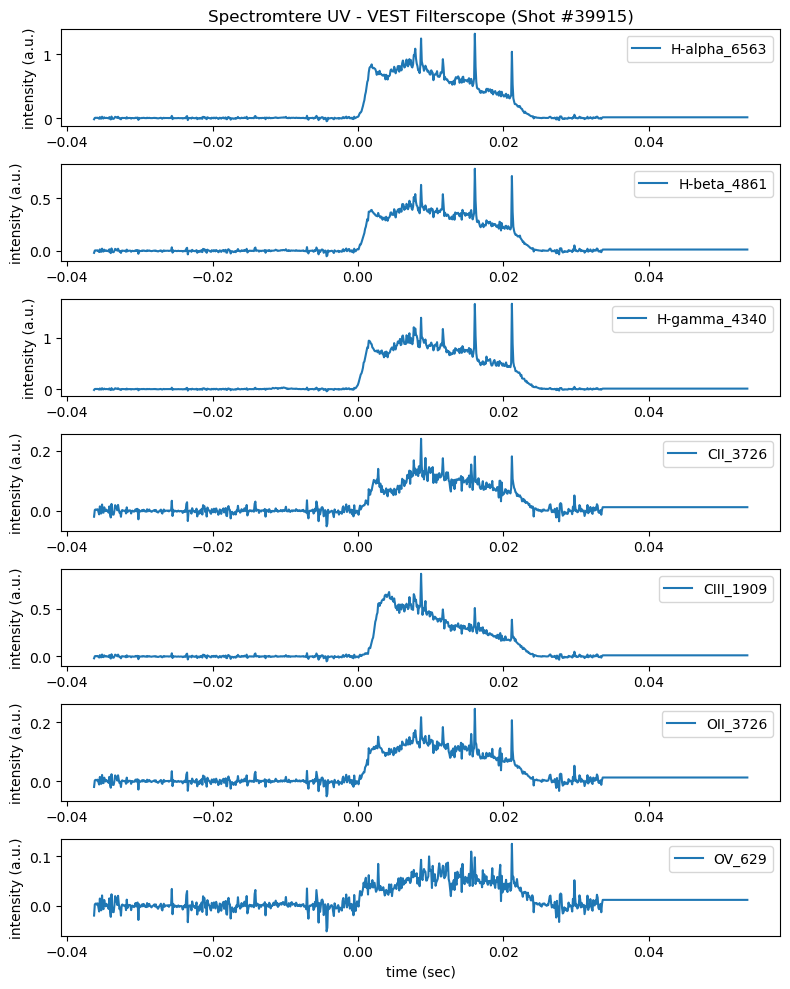

In [ ]:
def plot_spectrometer_uv(ods):
    fig, axes = plt.subplots(7, 1, figsize=(8, 10))  # Create 7 subplots

    shot = ods['dataset_description.data_entry.pulse']

    for i, ax in enumerate(axes):
        ax.plot(ods[f'spectrometer_uv.time'],
                ods[f'spectrometer_uv.channel.2.processed_line.{i}.intensity.data'],
                label=ods[f'spectrometer_uv.channel.2.processed_line.{i}.label'])
        if i == 0:
            ax.set_title(f"Spectromtere UV - VEST Filterscope (Shot #{shot})")
        if i == 6:
            ax.set_xlabel('time (sec)')
        ax.set_ylabel('intensity (a.u.)')
        ax.legend()

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

plot_spectrometer_uv(ods)

## 4. 다양한 시나리오의 진단 데이터 비교 분석

In [ ]:
# Equilibrium from geqdsk file of VFIT profile fitting.
# VFIT의 EFIT-Like 평형 루틴으로 생성된 gfile(geqdsk)을 불러오는 것이 가능합니다.

# ods2 = ODS()
# filepath = './Sample Data/g039020.031180'
# eq = OMFITgeqdsk(filepath)
# ods= eq.to_omas()
# #eq.from_omas()

In [ ]:
# ods2.plot_equilibrium_summary()
# # eq.plot() # same plot

### Fast Camera data

Fast camera data plot입니다. iterval 값을 변경하여 동영상의 속도를 바꿀 수 있습니다.

In [ ]:
ods3 = ODS()
ods3 = ods3.load('./Sample Data/fast_camera.json')
print_fast_camera(ods3, shot_num=30000, interval=200)

### Charge_exchange



In [ ]:
# ods.plot_charge_exchange_overlay()

In [ ]:
# Ion doppler spectroscophy: line integrated C-III, O-II intensity, toroidal rotation speed, ion temperature (1 channel fast sampling option / 10 channel radial profile option)
ods4 = ODS()
ods4=ods4.load('./Sample Data/vfit_ion_doppler_single.json', consistency_check=False)
plot_charge_exchange(ods4)


In [ ]:
# Plot the results (profile case)
ods5 = ODS()
ods5=ods5.load('./Sample Data/vfit_ion_doppler_profile.json', consistency_check=False)
plot_ion_doppler(ods5)



### Thomson
- Measured raidial position

In [ ]:
ods6 = ODS()
ods6 = ods6.load('./Sample Data/thomson_scattering.json')
ods6.plot_thomson_scattering_overlay()

In [ ]:
plot_thomson(ods6)
#error_bar

In [ ]:
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.n_e.data'][:,0]), unumpy.std_devs(ods['thomson_scattering.channel.:.n_e.data'][:,0]),label=f't={ods["thomson_scattering.time"][0]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.n_e.data'][:,1]), unumpy.std_devs(ods['thomson_scattering.channel.:.n_e.data'][:,1]),label=f't={ods["thomson_scattering.time"][1]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.n_e.data'][:,2]), unumpy.std_devs(ods['thomson_scattering.channel.:.n_e.data'][:,2]),label=f't={ods["thomson_scattering.time"][2]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.n_e.data'][:,3]), unumpy.std_devs(ods['thomson_scattering.channel.:.n_e.data'][:,3]),label=f't={ods["thomson_scattering.time"][3]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.n_e.data'][:,4]), unumpy.std_devs(ods['thomson_scattering.channel.:.n_e.data'][:,4]),label=f't={ods["thomson_scattering.time"][4]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.n_e.data'][:,5]), unumpy.std_devs(ods['thomson_scattering.channel.:.n_e.data'][:,5]),label=f't={ods["thomson_scattering.time"][5]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.n_e.data'][:,6]), unumpy.std_devs(ods['thomson_scattering.channel.:.n_e.data'][:,6]),label=f't={ods["thomson_scattering.time"][6]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.n_e.data'][:,7]), unumpy.std_devs(ods['thomson_scattering.channel.:.n_e.data'][:,7]),label=f't={ods["thomson_scattering.time"][7]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.n_e.data'][:,8]), unumpy.std_devs(ods['thomson_scattering.channel.:.n_e.data'][:,8]),label=f't={ods["thomson_scattering.time"][8]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.n_e.data'][:,9]), unumpy.std_devs(ods['thomson_scattering.channel.:.n_e.data'][:,9]),label=f't={ods["thomson_scattering.time"][9]}')
plt.xlabel('R [m]')
plt.ylabel('n_e [m^-3]')
plt.title('Electron density')
plt.legend()
plt.show()

plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.t_e.data'][:,0]), unumpy.std_devs(ods['thomson_scattering.channel.:.t_e.data'][:,0]),label=f't={ods["thomson_scattering.time"][0]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.t_e.data'][:,1]), unumpy.std_devs(ods['thomson_scattering.channel.:.t_e.data'][:,1]),label=f't={ods["thomson_scattering.time"][1]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.t_e.data'][:,2]), unumpy.std_devs(ods['thomson_scattering.channel.:.t_e.data'][:,2]),label=f't={ods["thomson_scattering.time"][2]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.t_e.data'][:,3]), unumpy.std_devs(ods['thomson_scattering.channel.:.t_e.data'][:,3]),label=f't={ods["thomson_scattering.time"][3]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.t_e.data'][:,4]), unumpy.std_devs(ods['thomson_scattering.channel.:.t_e.data'][:,4]),label=f't={ods["thomson_scattering.time"][4]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.t_e.data'][:,5]), unumpy.std_devs(ods['thomson_scattering.channel.:.t_e.data'][:,5]),label=f't={ods["thomson_scattering.time"][5]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.t_e.data'][:,6]), unumpy.std_devs(ods['thomson_scattering.channel.:.t_e.data'][:,6]),label=f't={ods["thomson_scattering.time"][6]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.t_e.data'][:,7]), unumpy.std_devs(ods['thomson_scattering.channel.:.t_e.data'][:,7]),label=f't={ods["thomson_scattering.time"][7]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.t_e.data'][:,8]), unumpy.std_devs(ods['thomson_scattering.channel.:.t_e.data'][:,8]),label=f't={ods["thomson_scattering.time"][8]}')
plt.errorbar(ods['thomson_scattering.channel.:.position.r'], unumpy.nominal_values(ods['thomson_scattering.channel.:.t_e.data'][:,9]), unumpy.std_devs(ods['thomson_scattering.channel.:.t_e.data'][:,9]),label=f't={ods["thomson_scattering.time"][9]}')
plt.xlabel('R [m]')
plt.ylabel('T_e [eV]')
plt.title('Electron temperature')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
import numpy as np
from scipy.interpolate import make_interp_spline

def plot_thomson_time(ods):
    fig = plt.figure(figsize=(20, 8))
    gs = GridSpec(1, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

    time_steps = len(ods["thomson_scattering.time"])
    r = ods['thomson_scattering.channel.:.position.r']

    # 축 범위 설정을 위한 초기값
    n_e_min, n_e_max = np.inf, -np.inf
    t_e_min, t_e_max = np.inf, -np.inf

    # 전체 데이터에서 min, max 값 찾기
    for frame in range(time_steps):
        n_e = ods['thomson_scattering.channel.:.n_e.data'][:, frame]
        t_e = ods['thomson_scattering.channel.:.t_e.data'][:, frame]
        n_e_min = min(n_e_min, np.min(n_e))
        n_e_max = max(n_e_max, np.max(n_e))
        t_e_min = min(t_e_min, np.min(t_e))
        t_e_max = max(t_e_max, np.max(t_e))

    def smooth_data(x, y):
        x_smooth = np.linspace(x.min(), x.max(), 300)
        spl = make_interp_spline(x, y, k=3)
        y_smooth = spl(x_smooth)
        return x_smooth, y_smooth

    def update(frame):
        ax1.clear()
        ax2.clear()

        n_e = ods['thomson_scattering.channel.:.n_e.data'][:, frame]
        t_e = ods['thomson_scattering.channel.:.t_e.data'][:, frame]

        try:
            n_e_err = ods['thomson_scattering.channel.:.n_e.error'][:, frame]
        except IndexError:
            n_e_err = np.zeros_like(n_e)

        try:
            t_e_err = ods['thomson_scattering.channel.:.t_e.error'][:, frame]
        except IndexError:
            t_e_err = np.zeros_like(t_e)

        r_smooth, n_e_smooth = smooth_data(r, n_e)
        _, t_e_smooth = smooth_data(r, t_e)

        ax1.errorbar(r, n_e, yerr=n_e_err, fmt='o', alpha=0.5)
        ax1.plot(r_smooth, n_e_smooth, '-')
        ax1.set_xlabel('R [m]')
        ax1.set_ylabel('n_e [m^-3]')
        ax1.set_title(f'Electron density (t={ods["thomson_scattering.time"][frame]})')
        ax1.grid(True)
        ax1.set_ylim(n_e_min, n_e_max)

        ax2.errorbar(r, t_e, yerr=t_e_err, fmt='o', alpha=0.5)
        ax2.plot(r_smooth, t_e_smooth, '-')
        ax2.set_xlabel('R [m]')
        ax2.set_ylabel('T_e [eV]')
        ax2.set_title(f'Electron temperature (t={ods["thomson_scattering.time"][frame]})')
        ax2.grid(True)
        ax2.set_ylim(t_e_min, t_e_max)

    anim = animation.FuncAnimation(fig, update, frames=time_steps, interval=500, repeat=True)
    plt.tight_layout()
    return anim

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
import numpy as np

def plot_thomson_time(ods):
    fig = plt.figure(figsize=(20, 8))
    gs = GridSpec(1, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

    time_steps = len(ods["thomson_scattering.time"])
    r = ods['thomson_scattering.channel.:.position.r']

    def update(frame):
        ax1.clear()
        ax2.clear()


        n_e_min = 0.
        n_e_max= 2.2
        # 오차 데이터 처리
        try:
            n_e_err = ods['thomson_scattering.channel.:.n_e.error'][:, frame]
        except IndexError:
            n_e_err = np.zeros_like(n_e)  # 오차 데이터가 없는 경우 0으로 설정

        try:
            t_e_err = ods['thomson_scattering.channel.:.t_e.error'][:, frame]
        except IndexError:
            t_e_err = np.zeros_like(t_e)  # 오차 데이터가 없는 경우 0으로 설정

        ax1.errorbar(r, n_e, yerr=n_e_err, fmt='o-')
        ax1.set_xlabel('R [m]')
        ax1.set_ylabel('n_e [m^-3]')
        ax1.set_title(f'Electron density (t={ods["thomson_scattering.time"][frame]})')
        ax1.grid(True)
        ax1.set_ylim(n_e_min, n_e_max)

        ax2.errorbar(r, t_e, yerr=t_e_err, fmt='o-')
        ax2.set_xlabel('R [m]')
        ax2.set_ylabel('T_e [eV]')
        ax2.set_title(f'Electron temperature (t={ods["thomson_scattering.time"][frame]})')
        ax2.grid(True)
        ax2.set_ylim(t_e_min, t_e_max)

    anim = animation.FuncAnimation(fig, update, frames=time_steps, interval=500, repeat=True)
    plt.tight_layout()
    return anim




In [ ]:
anim = plot_thomson_time(ods)
from IPython.display import HTML; HTML(anim.to_jshtml())

## 5. 평형 데이터 처리 및 분석